# Wright equation

In [10]:
using DifferentialEquations
using QuadGK
using Plots
# using Interact
using Measures
gr()

Plots.GRBackend()

In [11]:
function wrightdde(du,u,h,p,t)
du[1] = p[1]*u[1]*(1.0-h(p,t-p[2])[1])
end

# Initial function
init_x(x)=0.1*sin(x)+0.8
h(p, t) = [init_x(t)]
u0 = [init_x(0)]

## Initial function

p=[5.0,1.0]
lags = [p[2]]
tspan = (0.0,250.0)

prob = DDEProblem(wrightdde,u0,h,tspan,p; constant_lags=lags)

#sol = solve(prob)
alg = MethodOfSteps(Tsit5())
sol = solve(prob,alg,reltol=1e-6)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 3710-element Array{Float64,1}:
   0.0                
   0.02643139374057974
   0.08292112779405444
   0.15446832528082732
   0.24194198637521408
   0.3449202600052519 
   0.46350641782704866
   0.5977858582771667 
   0.748770755494484  
   0.9188046653823583 
   1.0                
   1.1164959076191237 
   1.169971915450943  
   ⋮                  
 247.30593805715458   
 247.32285195948253   
 247.3412676410345    
 247.36181584451947   
 247.38557033708005   
 247.4146018331965    
 247.45380950428392   
 247.52204507689945   
 247.6570307857778    
 248.30845728835652   
 249.99624541180728   
 250.0                
u: 3710-element Array{Array{Float64,1},1}:
 [0.8]        
 [0.830533]   
 [0.899152]   
 [0.992866]   
 [1.11821]    
 [1.28162]    
 [1.49177]    
 [1.75873]    
 [2.09547]    
 [2.519]      
 [2.73657]    
 [2.95281]    
 [2.97037]    
 ⋮            
 [1.04024e-7] 
 [8.11644e-8] 
 [5.83457e

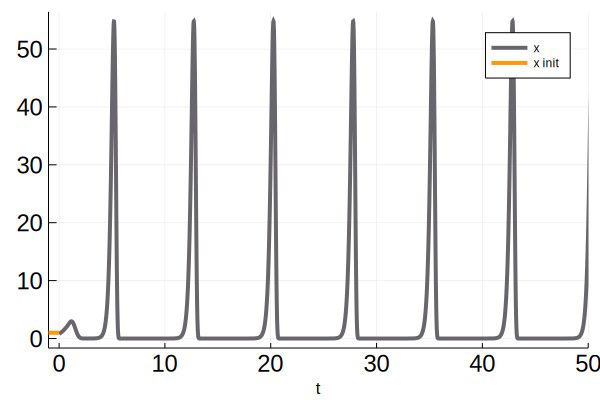

In [12]:
plot(sol,
    vars=(0,1),
    linewidth=4,
    color="#6a656d",
    label="x",
    xtickfont = font(16),
#    xticks = 0:2:200,
    ytickfont = font(16)) # legend=false
x = range(-1,stop=0,length=10)
plot!(x,x->1.0,
    linewidth=4,
    color="#FF9900",label="x init")
plot!(xlim=(-1,50))